# Machine Learning :
is a subset of artificial intelligence that focuses on the development of algorithms and statistical models that enable computers to perform tasks without explicit instructions. It involves the use of data to train models, allowing them to make predictions or decisions based on new, unseen data. Machine learning has various applications, including image recognition, natural language processing, and recommendation systems.

Common Techniques in Machine Learning:
1. Supervised Learning: Involves training a model on labeled data, where the correct output is known. The model learns to map inputs to outputs and can make predictions on unseen data.
2. Unsupervised Learning: Involves training a model on unlabeled data, where the correct output is not known. The model learns to identify patterns and structures in the data.
3. Reinforcement Learning: Involves training a model to make decisions by rewarding desired behaviors and penalizing undesired ones. The model learns to maximize cumulative rewards over time.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

## Data Cleaning


In [3]:
dataset = pd.read_csv(r"/Users/adityagoyal/Downloads/Dataset/loan_data_set.csv")
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


## missing value handeling

In [4]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

1. Data Cleaning

In [5]:
dataset.shape

(614, 13)

In [6]:
(dataset.isnull().sum()/dataset.shape[0])*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

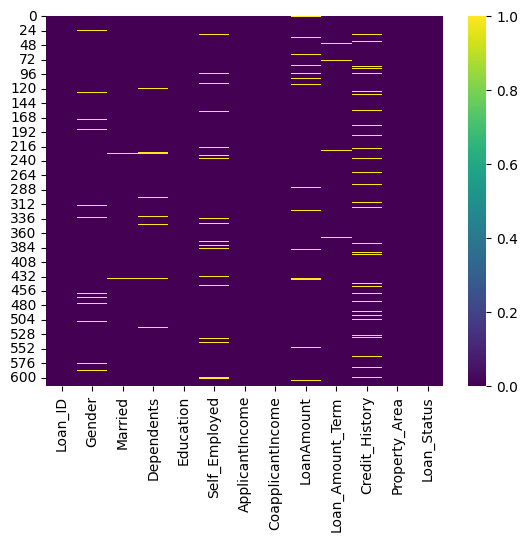

In [7]:
sns.heatmap(dataset.isnull(), cmap='viridis')
plt.show()

In [8]:
dataset.drop(columns=["Credit_History"], inplace=True)

### dataset = dataset.dropna(inplace=True)
used to remove all rows with any NaN values, but we will handle missing values differently here.

### dataset.fillna(10)
used to fill NaN values with 10, but we will handle missing values differently here.


### dataset.fillna(method='ffill', inplace=True) 
Forward fill to handle missing values
### dataset.fillna(method='bfill', inplace=True)
Backward fill to handle any remaining missing values
axis = 0 means fill along the rows, axis=1 would mean fill along the columns

In [9]:
dataset["Gender"].fillna(dataset["Gender"].mode()[0], inplace=True)
dataset["Married"].fillna(dataset["Married"].mode()[0], inplace=True)
dataset["Dependents"].fillna(dataset["Dependents"].mode()[0], inplace=True)

/var/folders/_y/m7xry_ln4bj19gbmb97tfm_40000gn/T/ipykernel_3582/660313644.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Gender"].fillna(dataset["Gender"].mode()[0], inplace=True)
/var/folders/_y/m7xry_ln4bj19gbmb97tfm_40000gn/T/ipykernel_3582/660313644.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

In [10]:
for i in dataset.columns:
    if dataset[i].dtype == "object":
        print(i, dataset[i].unique())

Loan_ID ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP001289

In [11]:
for i in dataset.select_dtypes(include=["object"]).columns:
    dataset[i].fillna(dataset[i].mode()[0], inplace=True)

/var/folders/_y/m7xry_ln4bj19gbmb97tfm_40000gn/T/ipykernel_3582/3391589122.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[i].fillna(dataset[i].mode()[0], inplace=True)


In [12]:
dataset.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Urban,Y


In [14]:
dataset["LoanAmount"].fillna(dataset["LoanAmount"].mean(), inplace=True)
dataset["Loan_Amount_Term"].fillna(dataset["Loan_Amount_Term"].mode()[0], inplace=True)

/var/folders/_y/m7xry_ln4bj19gbmb97tfm_40000gn/T/ipykernel_3582/1148607765.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["LoanAmount"].fillna(dataset["LoanAmount"].mean(), inplace=True)
/var/folders/_y/m7xry_ln4bj19gbmb97tfm_40000gn/T/ipykernel_3582/1148607765.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
da = imputer.fit_transform(dataset[["LoanAmount", "Loan_Amount_Term", "ApplicantIncome", "CoapplicantIncome",]]) 

Encoding


# 1. One Hot Encoding
One-hot encoding is a technique used to convert categorical variables into numerical variables. It is a way to
represent categorical data in a numerical format that can be processed by machine learning algorithms.

In [16]:
en_data = dataset[["Gender", "Married"]]
pd.get_dummies(en_data).info()
pd.get_dummies(en_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Gender_Female  614 non-null    bool 
 1   Gender_Male    614 non-null    bool 
 2   Married_No     614 non-null    bool 
 3   Married_Yes    614 non-null    bool 
dtypes: bool(4)
memory usage: 2.5 KB


,Gender_Female,Gender_Male,Married_No,Married_Yes
0,False,True,True,False
1,False,True,False,True
2,False,True,False,True
3,False,True,False,True
4,False,True,True,False
...,...,...,...,...
609,True,False,True,False
610,False,True,False,True
611,False,True,False,True
612,False,True,False,True


In [17]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
obe = OneHotEncoder(drop='first', sparse_output=False)
# drop='first' is used to avoid the dummy variable trap, where one category can be perfectly predicted by the others.
# sparse_output=False returns a dense array instead of a sparse matrix.
ar = obe.fit_transform(en_data)

In [19]:
pd.DataFrame(ar, columns=["Gender_Male", "Married_Yes"])

,Gender_Male,Married_Yes
0,1.0,0.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,0.0
...,...,...
609,0.0,0.0
610,1.0,1.0
611,1.0,1.0
612,1.0,1.0


# 2. Lebel Encoding
Label encoding is a technique used to convert categorical variables into numerical variables by assigning a unique integer
to each category. It is a way to represent categorical data in a numerical format that can be processed by machine learning algorithms. 

In [20]:
daa = pd.read_csv(r"/Users/adityagoyal/Downloads/Dataset/loan_data_set.csv")
daa.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
daa["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [23]:
le.fit(daa["Property_Area"])

LabelEncoder()

In [24]:
le.transform(daa["Property_Area"])

array([2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 0, 0, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1,
       2, 1, 0, 1, 1, 0, 1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 2,
       1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 1, 1, 2, 1, 2, 2, 0, 1, 0, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 0,
       0, 1, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2,
       1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 0, 1, 0, 2,
       2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 0, 2, 1, 2, 2, 0, 0,
       1, 0, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2,

In [25]:
daa["Property_Area"] = le.transform(daa["Property_Area"])

In [26]:
daa["Property_Area"].unique()

array([2, 0, 1])

 Ordinal Encoding
 
The encoding of a message is the process of converting the message into a form that can be transmitted over
a communication channel. There are several types of encoding, including binary encoding, ASCII encoding, and
unicode encoding.

In [27]:
df = pd.DataFrame({"size": ["s","m","l","xl","xxl","xs","s","m","l","xl","xxl","m","l"]})
df.head(3)

,size
0,s
1,m
2,l


In [28]:
from sklearn.preprocessing import OrdinalEncoder


In [29]:
ord_data = [["s","m","l","xl","xxl","xs"]]

In [30]:
oe = OrdinalEncoder(categories=ord_data)
oe.fit(df[["size"]])

,categories,"[['s', 'm', ...]]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [31]:
df["size_en"] = oe.transform(df[["size"]])

In [32]:
df

,size,size_en
0,s,0.0
1,m,1.0
2,l,2.0
3,xl,3.0
4,xxl,4.0
5,xs,5.0
6,s,0.0
7,m,1.0
8,l,2.0
9,xl,3.0


In [33]:
ord_data1 = {"s":0,"m":1,"l":2,"xl":3,"xxl":4,"xs":5}

In [34]:
df["size_en_map"] = df["size"].map(ord_data1)

In [35]:
df

,size,size_en,size_en_map
0,s,0.0,0
1,m,1.0,1
2,l,2.0,2
3,xl,3.0,3
4,xxl,4.0,4
5,xs,5.0,5
6,s,0.0,0
7,m,1.0,1
8,l,2.0,2
9,xl,3.0,3


we can also do this with a loop, but it's a bit more complicated
we'll use the `map` function to apply the `lambda` function to each element
 in the list, and then convert the result to a list
result = list(map(lambda x: x**2, numbers))


In [36]:
daa1 = pd.read_csv(r"/Users/adityagoyal/Downloads/Dataset/loan_data_set.csv")
daa.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,2,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,Y


In [37]:
daa1["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [38]:
daa1["Property_Area"].fillna(dataset["Property_Area"].mode()[0], inplace = True)

/var/folders/_y/m7xry_ln4bj19gbmb97tfm_40000gn/T/ipykernel_3582/2866602900.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  daa1["Property_Area"].fillna(dataset["Property_Area"].mode()[0], inplace = True)


In [39]:
en_data_odd = [['Urban', 'Semiurban', 'Rural']]

In [40]:
from sklearn.preprocessing import OrdinalEncoder

In [41]:
oen = OrdinalEncoder(categories=en_data_odd)

In [42]:
daa1["Property_Area"] = oen.fit_transform(daa1[["Property_Area"]])

In [43]:
daa1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,0.0,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,2.0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,0.0,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,0.0,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,2.0,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,2.0,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,0.0,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,0.0,Y


# Outlier

In [44]:
data_a = pd.read_csv(r"/Users/adityagoyal/Downloads/Dataset/loan_data_set.csv")
data_a.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [45]:
data_a.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<Axes: xlabel='CoapplicantIncome'>

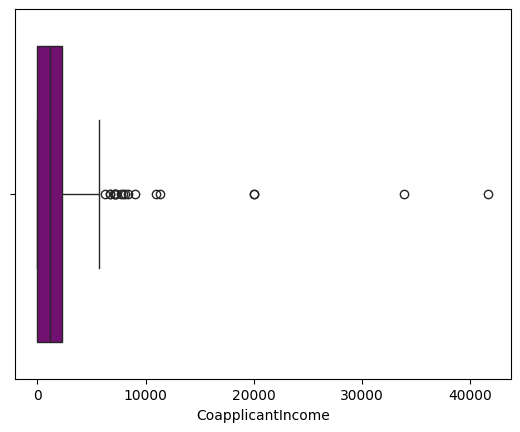

In [46]:
sns.boxplot(x="CoapplicantIncome" ,data=data_a, color="purple")

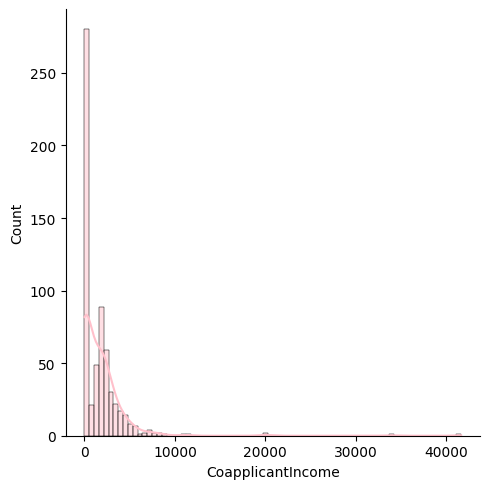

In [47]:
sns.displot(data_a["CoapplicantIncome"], kde=True, color="pink")

In [48]:
q1 = data_a["CoapplicantIncome"].quantile(0.25)
q3 = data_a["CoapplicantIncome"].quantile(0.75)

IQR method to remove outlier


In [49]:
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
lower_bound, upper_bound

(np.float64(-3445.875), np.float64(5743.125))

In [50]:
new_data = data_a[(data_a["CoapplicantIncome"] >= lower_bound) & (data_a["CoapplicantIncome"] <= upper_bound)]

In [51]:
new_data.shape

(596, 13)

{'whiskers': [<matplotlib.lines.Line2D at 0x1333a2e00>,
 'caps': [<matplotlib.lines.Line2D at 0x1333a3400>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1333a2aa0>],
 'medians': [<matplotlib.lines.Line2D at 0x1333a3a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1333a3d00>],
 'means': []}

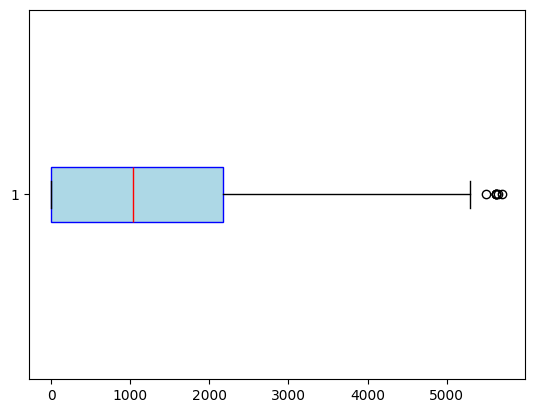

In [52]:
plt.boxplot(new_data["CoapplicantIncome"], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'), medianprops=dict(color='red'))

Outlier detection with Z-Score
Outlier detection with Modified Z-Score


In [53]:
data_b = pd.read_csv(r"/Users/adityagoyal/Downloads/Dataset/loan_data_set.csv")
data_b.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [54]:
min_value = data_b["CoapplicantIncome"].mean() - 3 * data_b["CoapplicantIncome"].std()
max_value = data_b["CoapplicantIncome"].mean() + 3 * data_b["CoapplicantIncome"].std()
min_value, max_value

(np.float64(-7157.4993096454655), np.float64(10399.990905699668))

<Axes: xlabel='CoapplicantIncome'>

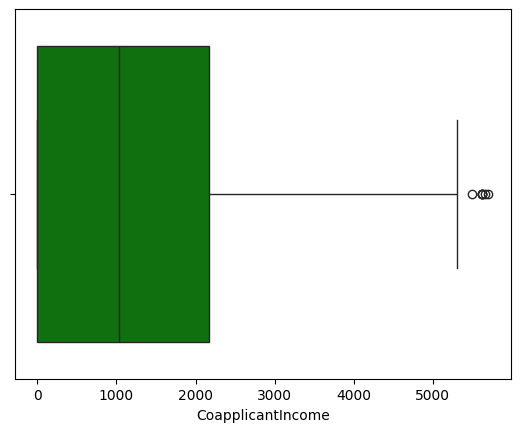

In [55]:
sns.boxplot(x="CoapplicantIncome", data=new_data, color="green")

In [56]:
z_score = (data_b["CoapplicantIncome"] - data_b["CoapplicantIncome"].mean()) / data_b["CoapplicantIncome"].std()
data_b["z_score"] = z_score
data_b

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.038700
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.554036
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.251774
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,-0.554036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.554036
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.554036
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,-0.472019
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,-0.554036


In [57]:
data_b[data_b["z_score"] < 3].shape

(608, 14)

# Feature Scaling Techniques 
### 1. Stadardization


In [58]:
daata = pd.read_csv(r"/Users/adityagoyal/Downloads/Dataset/loan_data_set.csv")
daata.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [59]:
data_a.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [60]:
daata["ApplicantIncome"].fillna(daata["ApplicantIncome"].mean(), inplace=True)

/var/folders/_y/m7xry_ln4bj19gbmb97tfm_40000gn/T/ipykernel_3582/2572123532.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  daata["ApplicantIncome"].fillna(daata["ApplicantIncome"].mean(), inplace=True)


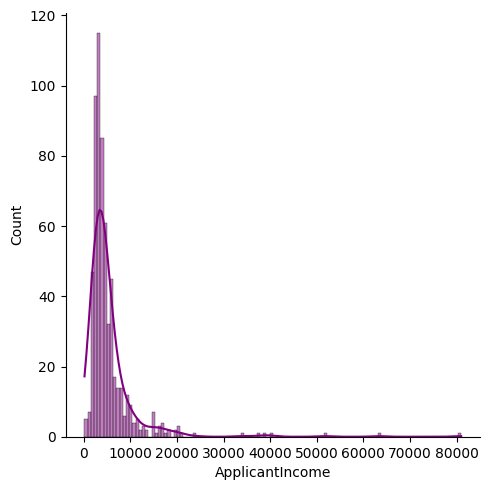

In [61]:
sns.displot(data_a["ApplicantIncome"], kde=True, color="purple")

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
ss = StandardScaler()
scaled_data = ss.fit_transform(daata[["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]])

In [64]:
ss.transform(daata[["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]])

array([[ 0.07299082, -0.55448733,         nan],
       [-0.13441195, -0.03873155, -0.21530913],
       [-0.39374734, -0.55448733, -0.94032807],
       ...,
       [ 0.43717437, -0.47240418,  1.24642259],
       [ 0.35706382, -0.55448733,  0.47462824],
       [-0.13441195, -0.55448733, -0.15683986]], shape=(614, 3))

In [65]:
daata["ApplicantIncome_ss"] = ss.fit_transform(daata[["ApplicantIncome"]])

In [66]:
daata.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_ss
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747


In [67]:
daata.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_ss
count,614.000000,614.000000,592.000000,600.00000,564.000000,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,-4.339634e-18
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,1.000815e+00
min,150.000000,0.000000,9.000000,12.00000,0.000000,-8.606493e-01
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,-4.138159e-01
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,-2.606393e-01
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,6.414426e-02
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.238462e+01


<function matplotlib.pyplot.show(close=None, block=None)>

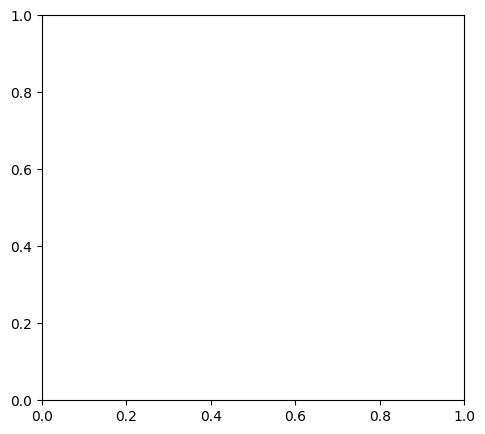

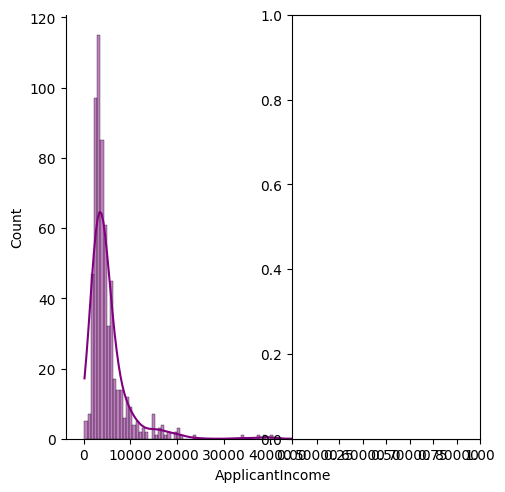

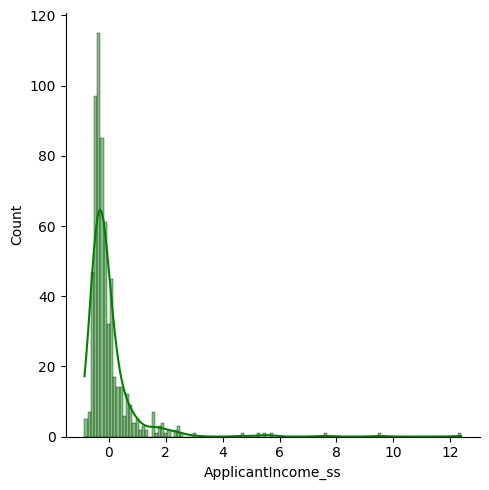

In [68]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.displot(data_a["ApplicantIncome"], kde=True, color="purple")
plt.subplot(1, 2, 2)
sns.displot(daata["ApplicantIncome_ss"], kde=True, color="green")
plt.show



In [69]:
x_trin = dataset.iloc[:, :-1].values
y_trin = dataset.iloc[:, -1].values

In [70]:
print(x_trin.shape, y_trin.shape)

x_train, x_test, y_train, y_test = train_test_split(x_trin, y_trin, test_size=0.2, random_state=42)

(614, 11) (614,)
